In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train_datagen = ImageDataGenerator(
     rescale=1./255,
    validation_split=0.20)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\786me\Desktop\FinalYearProject\ASDScanPath\ASD\Contrasted",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    r"C:\Users\786me\Desktop\FinalYearProject\ASDScanPath\ASD\Contrasted", # same directory as training data
    target_size=(224 , 224),
    batch_size=32,
    class_mode='binary',
    subset='validation') # set as validation data

img_size = (224, 224 , 3)

Found 439 images belonging to 2 classes.
Found 108 images belonging to 2 classes.


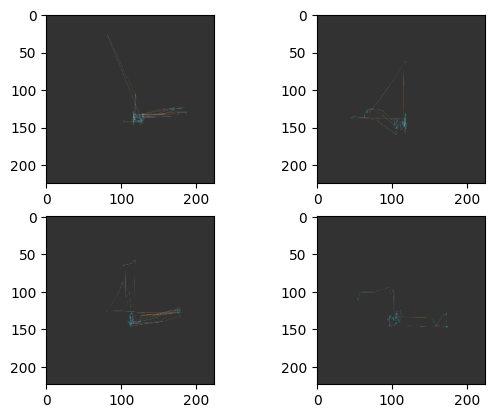

In [6]:
x_batch, y_batch = train_generator.next()
for i in range(4):
    image = x_batch[i]
    plt.subplot(2, 2, i+1)
    plt.imshow(image)
    
plt.show()

In [7]:
base_model = MobileNetV3Small(input_shape=img_size, include_top=False, weights='imagenet')

#Freeze weights 
for layer in base_model.layers[1:100]:
    layer.trainable = False


for i,layer in enumerate(base_model.layers):
    print(i,layer.name,layer.trainable)



0 input_1 True
1 rescaling False
2 Conv False
3 Conv/BatchNorm False
4 tf.__operators__.add False
5 re_lu False
6 tf.math.multiply False
7 multiply False
8 expanded_conv/depthwise/pad False
9 expanded_conv/depthwise False
10 expanded_conv/depthwise/BatchNorm False
11 re_lu_1 False
12 expanded_conv/squeeze_excite/AvgPool False
13 expanded_conv/squeeze_excite/Conv False
14 expanded_conv/squeeze_excite/Relu False
15 expanded_conv/squeeze_excite/Conv_1 False
16 tf.__operators__.add_1 False
17 re_lu_2 False
18 tf.math.multiply_1 False
19 expanded_conv/squeeze_excite/Mul False
20 expanded_conv/project False
21 expanded_conv/project/BatchNorm False
22 expanded_conv_1/expand False
23 expanded_conv_1/expand/BatchNorm False
24 re_lu_3 False
25 expanded_conv_1/depthwise/pad False
26 expanded_conv_1/depthwise False
27 expanded_conv_1/depthwise/BatchNorm False
28 re_lu_4 False
29 expanded_conv_1/project False
30 expanded_conv_1/project/BatchNorm False
31 expanded_conv_2/expand False
32 expanded_con

In [8]:
model = tf.keras.Sequential([
    base_model,tf.keras.layers.Dropout(0.2)
])
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units= 128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss = 'binary_focal_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 7, 7, 576)         0         
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 128)               3612800   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

In [9]:
history = model.fit(train_generator, validation_data=validation_generator, epochs = 20)

Epoch 1/20
14/14 [==============================] - 15s 531ms/step - loss: 1.1281 - accuracy: 0.5626 - val_loss: 0.1920 - val_accuracy: 0.6019
Epoch 2/20
14/14 [==============================] - 6s 430ms/step - loss: 0.2183 - accuracy: 0.6606 - val_loss: 0.1887 - val_accuracy: 0.6019
Epoch 3/20
14/14 [==============================] - 6s 424ms/step - loss: 0.1660 - accuracy: 0.6743 - val_loss: 0.1826 - val_accuracy: 0.6019
Epoch 4/20
14/14 [==============================] - 6s 425ms/step - loss: 0.1452 - accuracy: 0.6925 - val_loss: 0.1781 - val_accuracy: 0.6019
Epoch 5/20
14/14 [==============================] - 6s 419ms/step - loss: 0.1435 - accuracy: 0.6993 - val_loss: 0.1760 - val_accuracy: 0.6019
Epoch 6/20
14/14 [==============================] - 6s 419ms/step - loss: 0.1433 - accuracy: 0.6902 - val_loss: 0.1743 - val_accuracy: 0.6019
Epoch 7/20
14/14 [==============================] - 6s 420ms/step - loss: 0.1425 - accuracy: 0.7153 - val_loss: 0.1725 - val_accuracy: 0.6019
Epoch

In [11]:
##Confusion Matrix Generator and ROC Curve
y_pred_real = model.predict(validation_generator)
y_pred = [int(p >= 0.5) for p in y_pred_real] ##With sigmoid 1 neuron
##y_pred = np.argmax(Y_pred, axis=1) ##With softmax and 2 neurons 
y_true = validation_generator.classes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
print(cm)

4/4 [==============================] - 2s 177ms/step
[[65  0]
 [43  0]]
